# Graphs

In [ ]:
import networkx as nx

def check(actual, expected):
    if expected != actual:
        print(f"Function should return the value {expected}, it is returning the value {actual}")
    else:
        print(f"Congratulations, the test case passed!")

def draw(graph):
    g = nx.DiGraph(graph)
    nx.draw(g, with_labels=True, node_size=1000, node_color='#cfc8f4', arrowsize=40)

## 1. Adjacency matrix

If the nodes of a graph are the numbers from `0` to `n-1`, we can also represent it as an $n \times n$ matrix called the **adjacency matrix**.
    
$$\mathbf{A}=\begin{pmatrix}
 a_{00} & a_{01} & \cdots & a_{0(n-1)} \\
 a_{10} & a_{11} & \cdots & a_{1(n-1)} \\
 \vdots & \vdots & \ddots & \vdots \\
 a_{(n-1)0} & a_{(n-1)1} & \cdots & a_{(n-1)(n-1)} \\
\end{pmatrix}$$

Its entries $a_{ij}$ are **1** if there is an edge from $i$ to $j$, and **0** otherwise.

For example, the following graph `g = [[0,1], [0,2], [1,0], [1,2], [2,0]]`

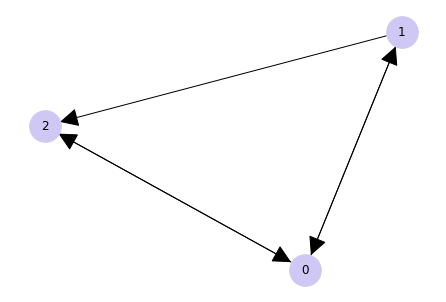

has the adjacency matrix

$$\mathbf{A}=\begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 0 & 0 \\
\end{pmatrix}$$

### Exercise 1.1

What is the **adjacency matrix** of the following graph?

List of edges: `[[0,1], [0,2], [0,3], [1,0], [1,2], [1,3], [2,0], [2,1], [2,3], [3,0]]`

Adjacency dict: `{0: [1,2,3], 1:[0,2,3], 2:[0,1,3], 3:[0]}`

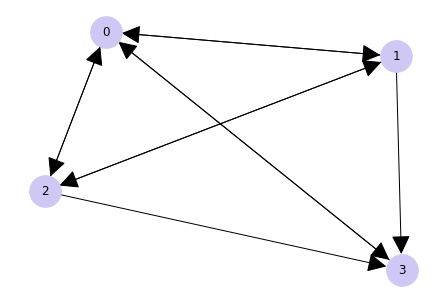

**Your answer here**

<details>
<summary><i>Click here to see the solution</i></summary>


$$\mathbf{A}=\begin{pmatrix}
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 \\
1 & 1 & 0 & 1 \\
1 & 0 & 0 & 0 \\
\end{pmatrix}$$
    
</details>

### Matrices in Python

We can represent a matrix as a list of lists in python.

For example:

$$\mathbf{A}=\begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 0 & 0 \\
\end{pmatrix}$$

would be represented as
```
[[0, 1, 1], [1, 0, 1], [1, 0, 0]]
```

### Exercise 1.2

Write a function `zeromat(n)` that returns an $n\times n$ matrix whose entries are all 0.

In [ ]:
def zeromat(n):
    # Your code here!


# Tests for your code
check(zeromat(2), [[0,0],[0,0]])
mat3 = zeromat(3)
check(mat3, [[0,0,0],[0,0,0],[0,0,0]])
# When we change one entry, check that only that entry changes.
mat3[0][0] = 1
check(mat3, [[1,0,0],[0,0,0],[0,0,0]])

### Exercise 1.3

Write a function `number_nodes(lst)` that takes a **list of edges** and returns the number of nodes in the graph.

Hint: Take the maximum of all the numbers appearing in your list, and add 1.

In [ ]:
def number_nodes(lst):
    # Your code here!

        
# Testing your code
check(number_nodes([[0, 1], [1, 2]]), 3)
check(number_nodes([[0, 0]]), 1)
check(number_nodes([[0, 1], [1, 2], [3, 4]]), 5)

### Exercise 1.4

Write a function `list_to_matrix(lst)` that takes a **list of edges** and turns it into an **adjacency matrix**.

Hint: You can use your function `zeromat` after computing how many nodes are in the graph.

In [ ]:
def list_to_matrix(lst):
    # Your code here!


# Testing your code
g1 = [[0,1], [0,2], [1,0], [1,2], [2,0]]
check(list_to_matrix(g1), [[0, 1, 1], [1, 0, 1], [1, 0, 0]])
g2 = [[0,1], [0,2], [0,3], [1,0], [1,2], [1,3], [2,0], [2,1], [2,3], [3,0]]
check(list_to_matrix(g2), [[0, 1, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1], [1, 0, 0, 0]])

## 2. Counting walks

A walk of length `n` is a sequence of `n+1` nodes connected by `n` edges.

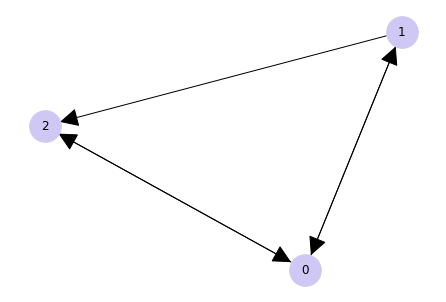

For example, the sequence $(1, 2, 0, 2)$ is a walk of length 3 in our graph. This walk starts at node 1 and ends at node 2.

The sequence $(0, 1, 1)$ is **not** a walk because there is no edge from 1 to 1.

### Exercise 2.1

In this graph

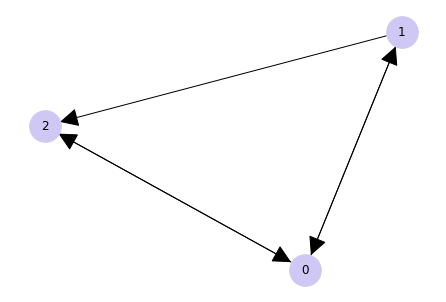

How many walks of **length 2** exist:
- a) from 0 to 0?
- b) from 0 to 1?
- c) from 0 to 2?
- d) from 1 to 0?
- e) from 1 to 1?
- f) from 1 to 2?
- g) from 2 to 0?
- h) from 2 to 1?
- i) from 2 to 2? 

**Your answer here**

<details>
<summary><i>Click here to see the solution</i></summary>

-    a) 2 -- (0, 1, 0) and (0, 2, 0)
-    b) 0
-    c) 1 -- (0, 1, 2)
-    d) 1
-    e) 1
-    f) 1
-    g) 0
-    h) 1
-    i) 1
    
</details>

### Exercise 2.2

In the same graph

- a) How many walks of **length 3** exist from 0 to 0?
- b) How many walks of **length 3** exist from 0 to 1?
- c) How many walks of **length 3** exist from 0 to 2?
- d) How many walks of **length 4** exist from 0 to 0?
- e) How many walks of **length 4** exist from 0 to 1?
- f) How many walks of **length 4** exist from 0 to 2?

**Your answer here**

<details>
<summary><i>Click here to see the solution</i></summary>

- a) 1 -- (0, 1, 2, 0)
- b) 2 -- (0, 1, 0, 1) and (0, 2, 0, 1)
- c) 2 -- (0, 2, 0, 2) and (0, 1, 0, 2)
- d) 4 -- (0, 1, 0, 1, 0) and (0, 1, 0, 2, 0) and (0, 2, 0, 1, 0) and (0, 2, 0, 2, 0)
- e) 1 -- (0, 1, 2, 0, 1)
- f) 3 -- (0, 1, 2, 0, 2) and (0, 2, 0, 1, 2) and (0, 1, 0, 1, 2)

</details>

## 3. Matrix multiplication

We will now discover an elegant way to compute the number of such paths.

If $A$ and $B$ are $n \times n$ matrices,
$$\mathbf{A}=\begin{pmatrix}
 a_{00} & a_{01} & \cdots & a_{0(n-1)} \\
 a_{10} & a_{11} & \cdots & a_{1(n-1)} \\
 \vdots & \vdots & \ddots & \vdots \\
 a_{(n-1)0} & a_{(n-1)1} & \cdots & a_{(n-1)(n-1)} \\
\end{pmatrix},\quad\mathbf{B}=\begin{pmatrix}
 b_{00} & b_{01} & \cdots & b_{0(n-1)} \\
 b_{10} & b_{11} & \cdots & b_{1(n-1)} \\
 \vdots & \vdots & \ddots & \vdots \\
 b_{(n-1)0} & b_{(n-1)1} & \cdots & b_{(n-1)(n-1)} \\
\end{pmatrix}$$
the **matrix product** $AB$ is the matrix
$$\mathbf{C} = \begin{pmatrix}
 c_{00} & c_{01} & \cdots & c_{0(n-1)} \\
 c_{10} & c_{11} & \cdots & c_{1(n-1)} \\
 \vdots & \vdots & \ddots & \vdots \\
 c_{(n-1)0} & c_{(n-1)1} & \cdots & c_{(n-1)(n-1)} \\
\end{pmatrix}$$
whose entries are
$$c_{ij} = a_{i0} b_{0j} + a_{i1} b_{1j} + \cdots + a_{i(n-1)} b_{(n-1)j}$$

**Example**

$$\mathbf{A}=\begin{pmatrix}
1 & 2 \\
0 & 4 \\
\end{pmatrix}$$

$$\mathbf{B}=\begin{pmatrix}
5 & 3 \\
-1 & 0 \\
\end{pmatrix}$$

$$\mathbf{AB}=\begin{pmatrix}
1 & 2 \\
0 & 4 \\
\end{pmatrix}
\begin{pmatrix}
5 & 3 \\
-1 & 0 \\
\end{pmatrix}
=\begin{pmatrix}
1\cdot5+2\cdot(-1) & 1\cdot3+2\cdot0 \\
0\cdot5+4\cdot(-1) & 0\cdot3+4\cdot0 \\
\end{pmatrix}
=\begin{pmatrix}
3 & 3 \\
-4 & 0 \\
\end{pmatrix}$$

### Exercise 3.1

Consider the adjacency matrix of our graph from before:

$$\mathbf{A}=\begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 0 & 0 \\
\end{pmatrix}$$

Compute $A\cdot A$

**Your answer here**

<details>
<summary><i>Click here to see the solution</i></summary>

$$\mathbf{A}=\begin{pmatrix}
2 & 0 & 1 \\
1 & 1 & 1 \\
0 & 1 & 1 \\
\end{pmatrix}$$
    
</details>

### Exercise 3.2

Compare the entries of $A\cdot A$ with the number of walks of length 2 you counted in **Exercise 2.1**. What do you notice?

**Your answer here**

<details>
<summary><i>Click here to see the solution</i></summary>

Let $S = A \cdot A$. The number of paths of length 2 from $i$ to $j$ equals the entry $s_{ij}$     
</details>

### Exercise 3.3

Write a function `matmul(A, B)` that takes two matrices and returns their **matrix product**.

Hint: The function `zeromat` from earlier might be useful.

In [ ]:
def matmul(a, b):
    # Your code here!


# Testing your code
a = [[1,2],[0,4]]
b = [[5,3],[-1,0]]
check(matmul(a, b), [[3, 3], [-4, 0]])
a = [[0, 1, 1], [1, 0, 1], [1, 0, 0]]
check(matmul(a, a), [[2, 0, 1], [1, 1, 1], [0, 1, 1]])

### Exercise 3.4

Use your code to compute the number of paths of length 2 for our graph with edge list `[[0,1], [0,2], [1,0], [1,2], [2,0]]`.

Compare with the results of Exercise 3.2

In [ ]:
# Your code here

### Exercise 3.5

For our graph from earlier with adjacency matrix

$$\mathbf{A}=\begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 0 & 0 \\
\end{pmatrix}$$

use your code to compute $S = A \cdot A \cdot A$.

In [ ]:
# Your code here

Compute the entries of $S$ with the number of walks of length 3 for our graph from Exercise 2.2! What do you notice?

**Your answer here**

<details>
<summary><i>Click here to see the solution</i></summary>

The number of paths of length 3 from $i$ to $j$ equals the entry $s_{ij}$.
    
</details>

### Conclusion

More generally, for a graph with adjacency matrix $A$, the number of paths of length `n` from $i$ to $j$ equals the $(i,j)$ entry of $A^n$.


### Exercise 3.6

We've seen in the previous exercise that it is a bit awkward to compute powers of a matrix using `matmul`. Write a new function `matpow(A, n)` that that computes $A^n$, the matrix $A$ to the $n$-th power, using `matmul`.

In [ ]:
def matpow(A, n):
    # Your code here


# Tests for your code
a = [[0, 1, 1], [1, 0, 1], [1, 0, 0]]
check(matpow(a, 2), [[2, 0, 1], [1, 1, 1], [0, 1, 1]])
check(matpow(a, 3), [[1, 2, 2], [2, 1, 2], [2, 0, 1]])
check(matpow(a, 4), [[4, 1, 3], [3, 2, 3], [1, 2, 2]])
b = [[1, 2],[0, 1]]
check(matpow(b, 5), [[1, 10], [0, 1]])

### Exercise 3.7

Use your function to compute the number of walks of length 4 for our graph. Compare with the results from Exercise 2.2!

`g = [[0,1], [0,2], [1,0], [1,2], [2,0]]`

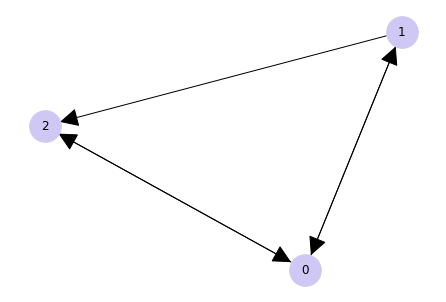

In [ ]:
# Your code here

### Exercise 3.8

For this graph:

`g = [[0,1], [0,2], [0,3], [1,0], [4,2], [1,4], [2,1], [2,3], [3,0]]`
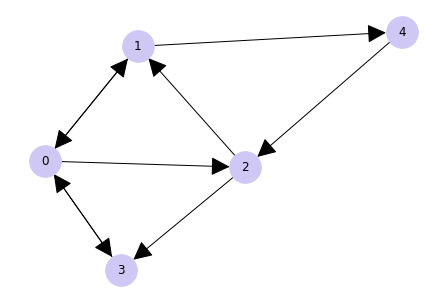

How many walks of length 5 are there starting at node 0 and ending at node 2?

In [ ]:
# Your code here

**Your answer here**

<details>
<summary><i>Click here to see the solution</i></summary>

```
g = [[0,1], [0,2], [0,3], [1,0], [4,2], [1,4], [2,1], [2,3], [3,0]]
a = list_to_matrix(g)
matpow(a, 5)
```

This gives
    
```
[[10, 7, 6, 7, 5],
 [4, 7, 6, 7, 2],
 [6, 4, 6, 4, 3],
 [4, 5, 3, 5, 2],
 [4, 3, 0, 3, 2]]
```
    
So the answer is 6 (0th row, 2nd column).
</details>

## 4. Why does this work?

### Exercise 4.1

Think about why this works.

Hint: If you know the number of paths of length $n-1$ from $x$ to $j$ for all nodes $j$, how can you find out the number of paths of length $n$ from $x$ to $y$?

How does that relate to multiplying $A^{n-1}$ with $A$, using the definition of matrix multiplication?

**Your answer here**

## 5. Challenge

Consider a graph with $N$ vertices numbered from 1 to $N$ and without edges, $N\geq3$. You need to make it connected (every vertice should be reachable from each other) in a such way that sums of numbers of vertices adjacent to each vertice are equal. 

Below you can see such graph for $N=3$.

<img src="w3d4_2.jpg">

Here each vertice has sum of nubers of adjacent vertices equals to 3.

For example for the graph above ```solve(3)``` *may* return ```{1: [3], 2: [3], 3: [1, 2]}```.

_Hint: solve the problem for even values of $N$ first_

In [ ]:
def solve(n):
    # Complete the function. It should return the graph adjacency dict of size n+1, with an empty first list.
    pass

In [ ]:
n = 3
check(solve(n), expected={0: [], 1: [3], 2: [3], 3: [1, 2]})
n = 4
check(solve(n), expected={0: [], 1: [2, 3], 2: [1, 4], 3: [1, 4], 4: [2, 3]})
n = 5
check(solve(n), expected={0: [], 1: [2, 3, 5], 2: [1, 4, 5], 3: [1, 4, 5], 4: [2, 3, 5], 5: [1, 2, 3, 4]})
n = 6
check(solve(n), expected={0: [], 1: [2, 3, 4, 5], 2: [1, 3, 4, 6], 3: [1, 2, 5, 6], 4: [1, 2, 5, 6], 5: [1, 3, 4, 6], 6: [2, 3, 4, 5]})